In [5]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_log_error 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import accuracy_score

In [6]:
try:
    data = pd.read_csv('data.csv', encoding='ISO-8859-1')
except Exception as e:
    print(f"Error reading the CSV file: {e}")

In [7]:
data_sample = data

In [8]:
data.size

4335272

In [9]:
data.isna().any().count()

8

In [10]:
data.dropna(axis=1)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,United Kingdom
...,...,...,...,...,...,...
541904,581587,22613,12,12/9/2011 12:50,0.85,France
541905,581587,22899,6,12/9/2011 12:50,2.10,France
541906,581587,23254,4,12/9/2011 12:50,4.15,France
541907,581587,23255,4,12/9/2011 12:50,4.15,France


In [11]:
data['datetime'] = pd.to_datetime(data['InvoiceDate'])
data['total spending'] = data['Quantity']*data['UnitPrice']
data['DateYMD'] = data["datetime"].dt.date

In [12]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datetime,total spending,DateYMD
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,2010-12-01


In [13]:
data.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datetime,total spending,DateYMD
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,2011-12-09 12:50:00,10.20,2011-12-09
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,2011-12-09 12:50:00,12.60,2011-12-09
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09 12:50:00,16.60,2011-12-09
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09 12:50:00,16.60,2011-12-09
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France,2011-12-09 12:50:00,14.85,2011-12-09


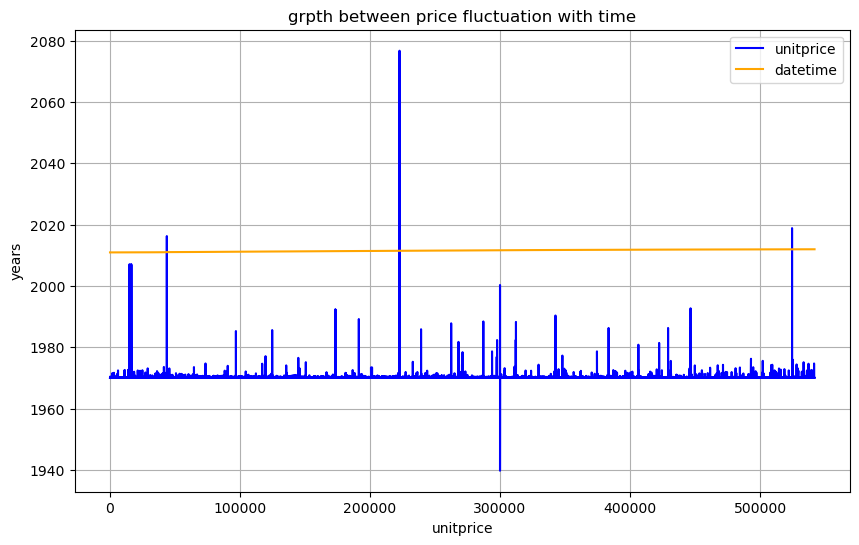

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['UnitPrice'], label='unitprice', color='blue')
plt.plot(data.index, data['datetime'], label='datetime', color='orange')
plt.title('grpth between price fluctuation with time')
plt.xlabel('unitprice')
plt.ylabel('years')
plt.legend()
plt.grid(True)
plt.show()

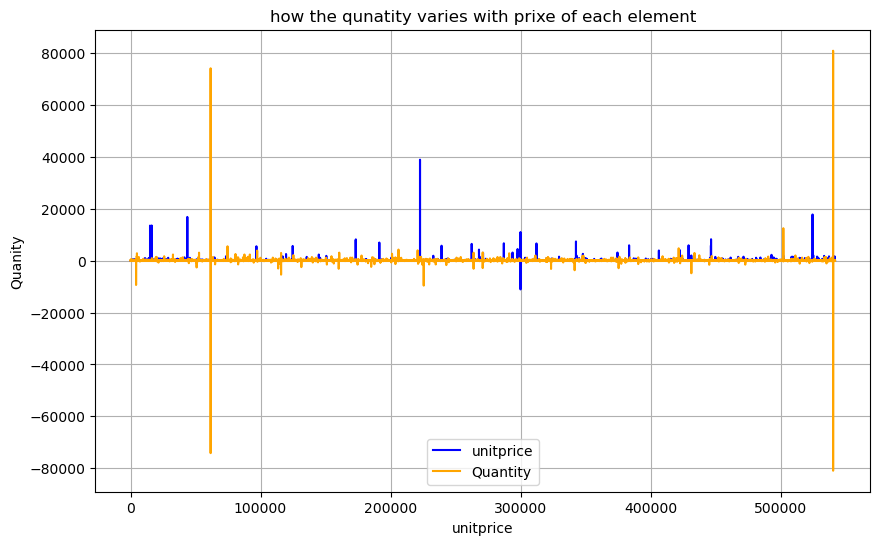

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['UnitPrice'], label='unitprice', color='blue')
plt.plot(data.index, data['Quantity'], label='Quantity', color='orange')
plt.title('how the qunatity varies with prixe of each element')
plt.xlabel('unitprice')
plt.ylabel('Quanity')
plt.legend()
plt.grid(True)
plt.show()

In [21]:
data[~data["CustomerID"].isna()]["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Greece', 'Singapore', 'Lebanon',
       'United Arab Emirates', 'Saudi Arabia', 'Czech Republic', 'Canada',
       'Unspecified', 'Brazil', 'USA', 'European Community', 'Bahrain',
       'Malta', 'RSA'], dtype=object)

In [22]:
gmvcountry = data.groupby("Country")['total spending'].sum().sort_values(ascending=False).reset_index()
gmvcountry

,Country,total spending
0,United Kingdom,8187806.364
1,Netherlands,284661.540
2,EIRE,263276.820
3,Germany,221698.210
4,France,197403.900
5,Australia,137077.270
6,Switzerland,56385.350
7,Spain,54774.580
8,Belgium,40910.960
9,Sweden,36595.910


In [23]:
ax = sns.barplot(data=gmvcountry, x="Country", y="total spending")
plt.yscale("log")
ax.figure.set_size_inches(200,50)
ax.set_ylabel("Transaction Value")
plt.title('country wise total spending')

Text(0.5, 1.0, 'country wise total spending')

Text(0.5, 1.0, 'country wise total spending')

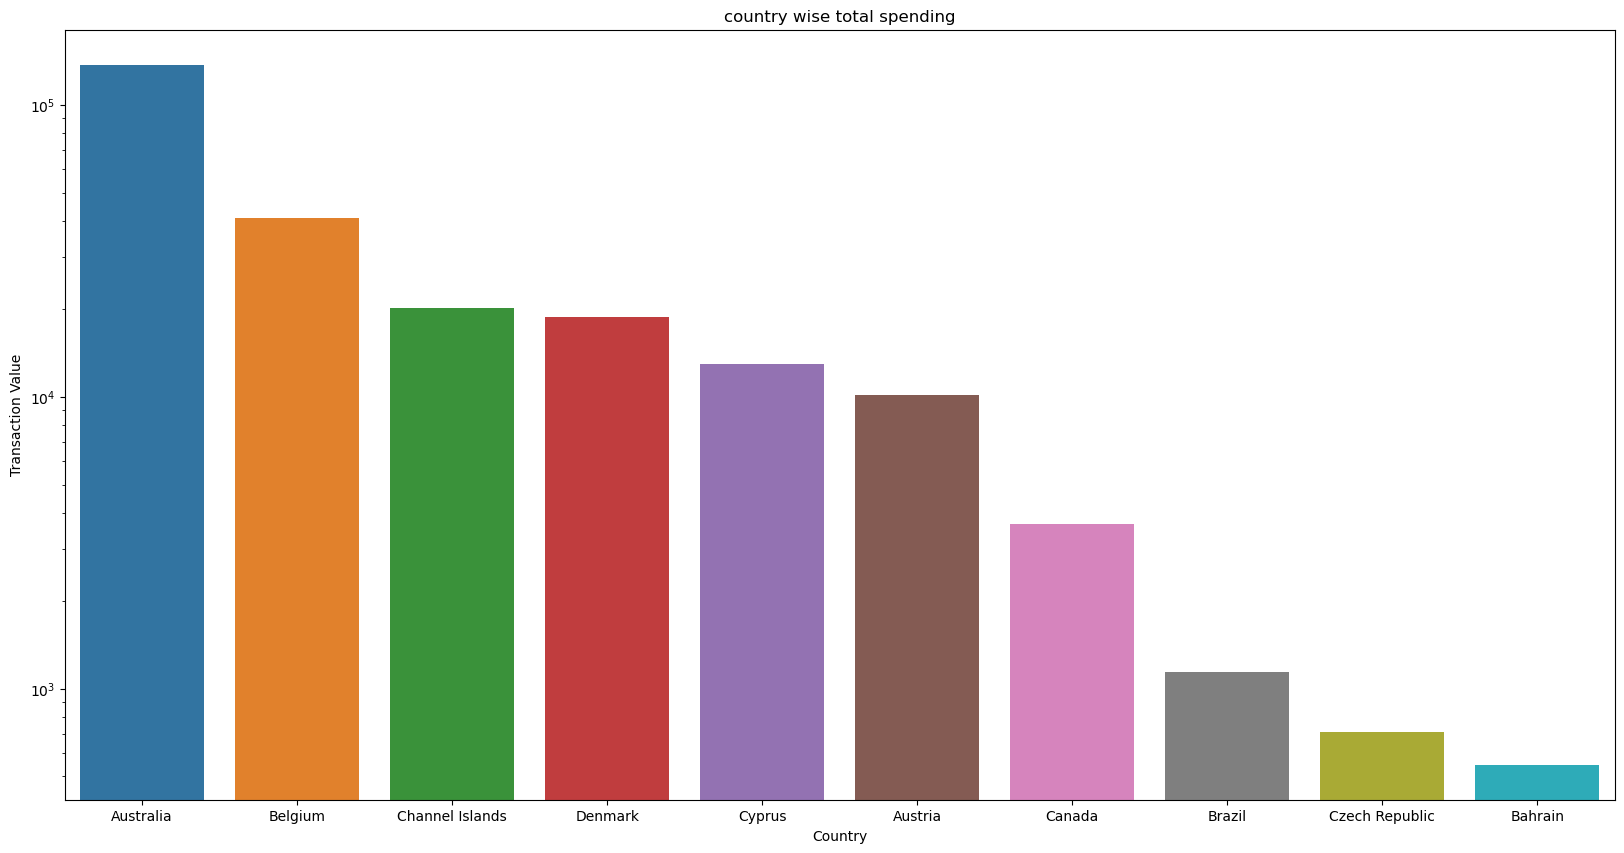

In [24]:
top_10_country = data.groupby("Country")['total spending'].sum().head(10).sort_values(ascending=False).reset_index()
ax = sns.barplot(data=top_10_country, x="Country", y="total spending")
plt.yscale("log")
ax.figure.set_size_inches(20,10)
ax.set_ylabel("Transaction Value")
plt.title('country wise total spending')

Text(0.5, 1.0, 'top 10 customers')

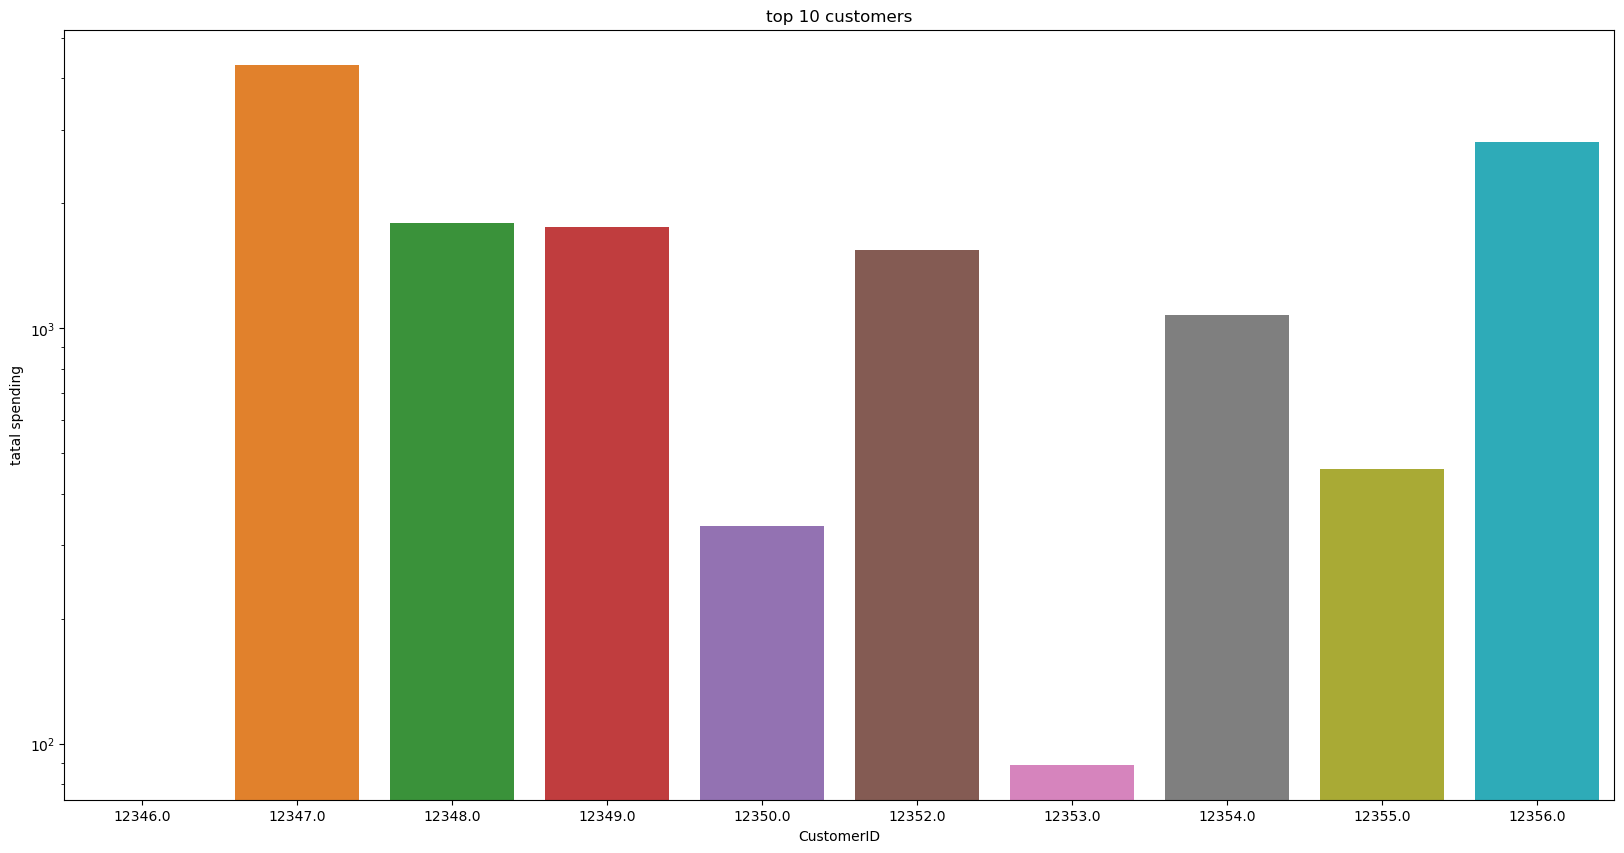

In [25]:
top_10_country = data.groupby("CustomerID")['total spending'].sum().head(10).sort_values(ascending=False).reset_index()
ax = sns.barplot(data=top_10_country, x="CustomerID", y="total spending")
plt.yscale("log")
ax.figure.set_size_inches(20,10)
ax.set_ylabel("tatal spending")
plt.title('top 10 customers')

<Axes: xlabel='DateYM'>

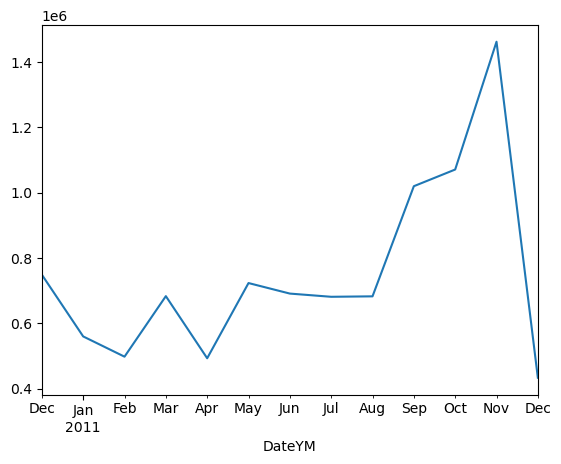

In [26]:
data['DateYM'] = data['datetime'].dt.to_period('M')
data.groupby('DateYM')['total spending'].sum().plot()

In [27]:
products_total_spending = data.groupby("Description").agg({"total spending": "sum"}) \
                    .sort_values(by="total spending", ascending=False) \
                    .reset_index() 
products_total_spending

,Description,total spending
0,DOTCOM POSTAGE,206245.480
1,REGENCY CAKESTAND 3 TIER,164762.190
2,WHITE HANGING HEART T-LIGHT HOLDER,99668.470
3,PARTY BUNTING,98302.980
4,JUMBO BAG RED RETROSPOT,92356.030
...,...,...
4218,Bank Charges,-7175.639
4219,CRUK Commission,-7933.430
4220,Adjust bad debt,-11062.060
4221,Manual,-68671.640


In [28]:
top_5_products_total_spending = data.groupby("Description").agg({"total spending": "sum"}) \
                    .sort_values(by="total spending", ascending=False).head() \
                    .reset_index() 
top_5_products_total_spending

,Description,total spending
0,DOTCOM POSTAGE,206245.48
1,REGENCY CAKESTAND 3 TIER,164762.19
2,WHITE HANGING HEART T-LIGHT HOLDER,99668.47
3,PARTY BUNTING,98302.98
4,JUMBO BAG RED RETROSPOT,92356.03


In [29]:
df = pd.DataFrame(data)
df['total spending'] = df['Quantity']*df['UnitPrice']
df.dropna(inplace=True)

In [30]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datetime,total spending,DateYMD,DateYM
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30,2010-12-01,2010-12
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,2010-12-01,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00,2010-12-01,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,2010-12-01,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,2010-12-01,2010-12
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,2011-12-09 12:50:00,10.20,2011-12-09,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,2011-12-09 12:50:00,12.60,2011-12-09,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09 12:50:00,16.60,2011-12-09,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09 12:50:00,16.60,2011-12-09,2011-12


In [31]:
X = df[['Quantity', 'UnitPrice','CustomerID']]
y = df['total spending']

In [32]:
df.dropna(axis=1)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,datetime,total spending,DateYMD,DateYM
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,15.30,2010-12-01,2010-12
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,2010-12-01,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,22.00,2010-12-01,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,2010-12-01,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,20.34,2010-12-01,2010-12
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,2011-12-09 12:50:00,10.20,2011-12-09,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,2011-12-09 12:50:00,12.60,2011-12-09,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09 12:50:00,16.60,2011-12-09,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,2011-12-09 12:50:00,16.60,2011-12-09,2011-12


In [33]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
nan_columns = X_train.columns[X_train.isnull().any()]
print(X_train[nan_columns].isnull().sum())

Series([], dtype: float64)


In [34]:
# imputer = SimpleImputer(strategy='mean')
# X_train = imputer.fit_transform(X_train)

In [35]:
linear_regression = LinearRegression()
decission_regression = DecisionTreeRegressor(random_state=42)
random_forest_regression = RandomForestRegressor(random_state=42)
models = {'Linear Regression': linear_regression, 'Decision Tree': decission_regression , 'Random Forest': random_forest_regression}

In [36]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [37]:
linear_regression_predictions = linear_regression.predict(X_test)
linear_regression_mse = mean_squared_error(y_test, linear_regression_predictions)
linear_regression_r2 = r2_score(y_test, linear_regression_predictions)

print("MSE:", linear_regression_mse)
print("R2 Score:", linear_regression_r2)

MSE: 6875.812917909565
R2 Score: -0.07707659363282415


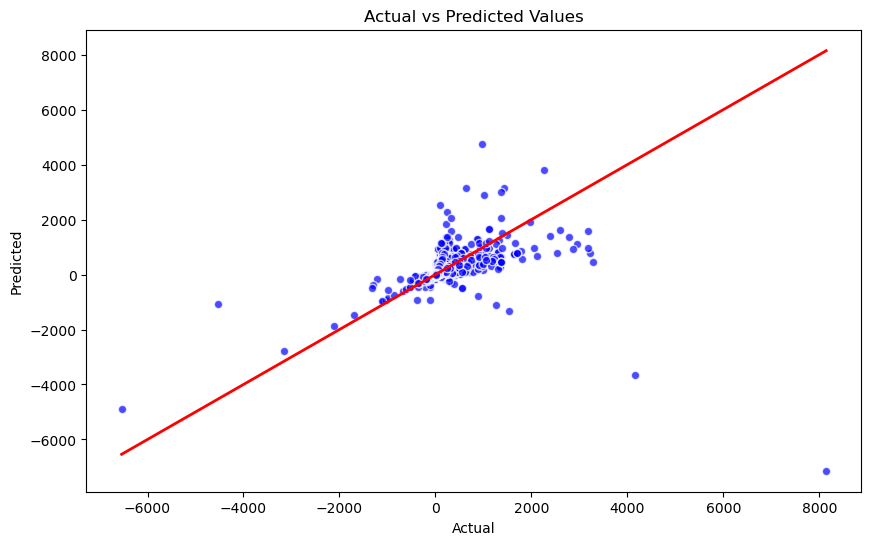

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_regression_predictions, color='blue', edgecolor='w', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

In [38]:
accuracy= r2_score(y_test, linear_regression_predictions)

In [39]:
decission_regression = DecisionTreeRegressor(random_state=42)
decission_regression.fit(X_train, y_train)
dt_predictions = decission_regression.predict(X_test)
dt_mse = mean_squared_error(y_test, dt_predictions)
dt_r2 = r2_score(y_test, dt_predictions)

In [40]:
print("\nDecision Tree Performance:")
print("Mean Squared Error:", dt_mse)
print("R^2 Score:", dt_r2)


Decision Tree Performance:
Mean Squared Error: 3509.1526245667724
R^2 Score: 0.45030119339617325


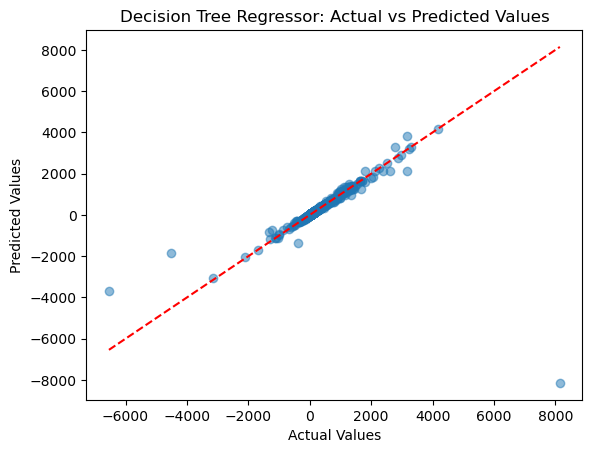

In [41]:
plt.scatter(y_test, dt_predictions, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--r')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regressor: Actual vs Predicted Values')
plt.show()

In [47]:
random_forest_regression.fit(X_train, y_train)
rf_predictions = random_forest_regression.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

In [48]:
print("\nRandom Forest Performance:")
print("Mean Squared Error:", rf_mse)
print("R^2 Score:", rf_r2)


Random Forest Performance:
Mean Squared Error: 2520.5556382652544
R^2 Score: 0.6051621076173591


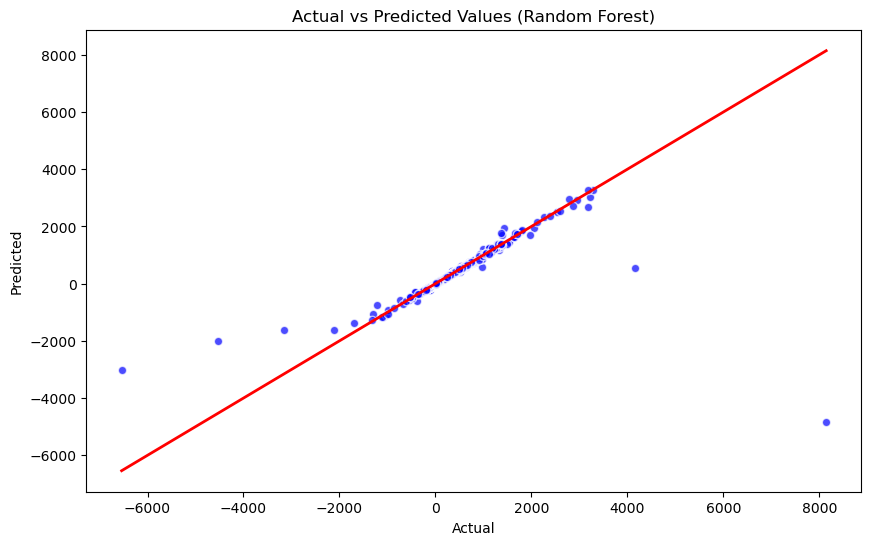

In [49]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_predictions, color='blue', edgecolor='w', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values (Random Forest)')
plt.show()